In [26]:
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [21]:
lf = datasets.fetch_lfw_people(min_faces_per_person=100,resize=0.4)

In [22]:
lf.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [23]:
lf.images.shape

(1140, 50, 37)

In [24]:
lf.data.shape

(1140, 1850)

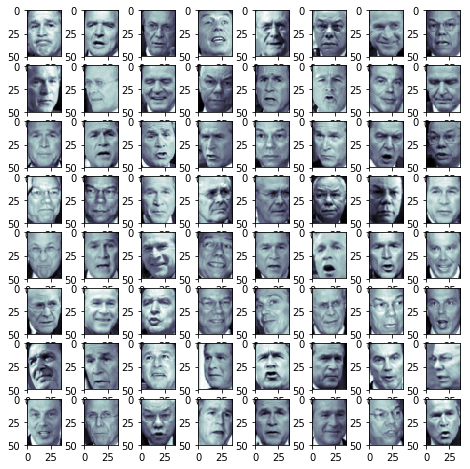

In [28]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(lf.images[i],cmap=plt.cm.bone)
plt.show()

In [32]:
x=lf.data
y=lf.target
x.shape

(1140, 1850)

In [36]:
pca=PCA()
x_transformed=pca.fit(x)

In [38]:
k=0
total=sum(pca.explained_variance_)
currentsum=0
while currentsum/total<0.99:
    currentsum+=pca.explained_variance_[k]
    k=k+1
k

347

In [41]:
pca=PCA(n_components=k,whiten=True)
transformed=pca.fit_transform(x)
transformed.shape

(1140, 347)

In [45]:
x_approx=pca.inverse_transform(transformed)
x_approx_images=x_approx.reshape((1140,50,37))

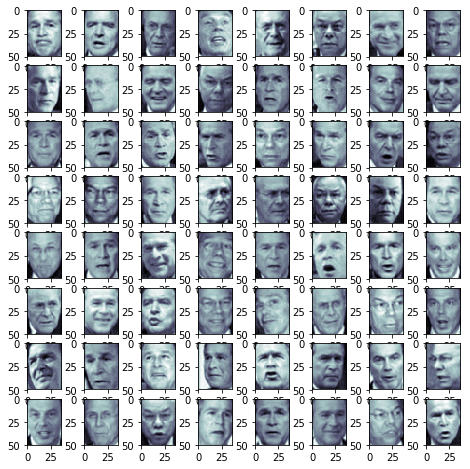

In [47]:
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(x_approx_images[i],cmap=plt.cm.bone)
plt.show()

In [49]:
eigen_val=pca.components_
eigen_val.shape

(347, 1850)

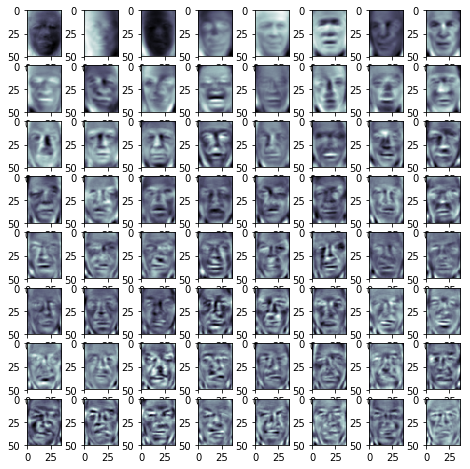

In [50]:
eigenfaces=eigen_val.reshape((k,50,37))
fig=plt.figure(figsize=(8,8))
for i in range(64):
    ax=fig.add_subplot(8,8,i+1)
    ax.imshow(eigenfaces[i],cmap=plt.cm.bone)
plt.show()